In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir ", os.getcwd())
curr_dir = os.getcwd()  # Call the function to get the current directory
train_path = os.path.join(curr_dir, "datasets", "Train")
test_path = os.path.join(curr_dir, "datasets", "Test")
valid_path = os.path.join(curr_dir, "datasets", "Valid")

Current Dir  d:\Potato Leaf Disease Detection project


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    color_mode="rgb",
    image_size=(128,128),
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    color_mode="rgb",
    image_size=(128,128),
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=364,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

d:\Potato Leaf Disease Detection project\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 364)    │       210,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 364)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │       419,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,308,927 (31.70 MB)

 Trainable params: 8,308,927 (31.70 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
traning_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 646ms/step - accuracy: 0.3459 - loss: 1.3993 - val_accuracy: 0.6100 - val_loss: 0.8973
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 622ms/step - accuracy: 0.6255 - loss: 0.7873 - val_accuracy: 0.6933 - val_loss: 0.5892
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 610ms/step - accuracy: 0.7189 - loss: 0.5899 - val_accuracy: 0.8767 - val_loss: 0.3078
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 608ms/step - accuracy: 0.8696 - loss: 0.3353 - val_accuracy: 0.8600 - val_loss: 0.3801
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 604ms/step - accuracy: 0.8638 - loss: 0.3409 - val_accuracy: 0.8233 - val_loss: 0.4879
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 606ms/step - accuracy: 0.8768 - loss: 0.3006 - val_accuracy: 0.9100 - val_loss: 0.2262
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 611ms/step - accuracy: 0.9396 - loss: 0.1719 - val_accuracy: 0.9333 - val_loss: 0.1846
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.9655 - loss: 0.1126 - val_accu

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.9794 - loss: 0.0396
Training accuracy: 0.9866666793823242


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9280 - loss: 0.2293
Validation accuracy: 0.9466666579246521


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
traning_history.history

{'accuracy': [0.4000000059604645,
  0.6511111259460449,
  0.7633333206176758,
  0.8822222352027893,
  0.8811110854148865,
  0.8877778053283691,
  0.9388889074325562,
  0.9655555486679077,
  0.9755555391311646,
  0.9788888692855835],
 'loss': [1.1861125230789185,
  0.7216742634773254,
  0.5166192650794983,
  0.32576146721839905,
  0.28844913840293884,
  0.27202939987182617,
  0.16229429841041565,
  0.10210629552602768,
  0.07753394544124603,
  0.06944851577281952],
 'val_accuracy': [0.6100000143051147,
  0.6933333277702332,
  0.8766666650772095,
  0.8600000143051147,
  0.8233333230018616,
  0.9100000262260437,
  0.9333333373069763,
  0.9300000071525574,
  0.9633333086967468,
  0.9466666579246521],
 'val_loss': [0.8973227143287659,
  0.5891913771629333,
  0.307824969291687,
  0.38005492091178894,
  0.48786234855651855,
  0.22620509564876556,
  0.18462787568569183,
  0.15848810970783234,
  0.11113215237855911,
  0.16449126601219177]}

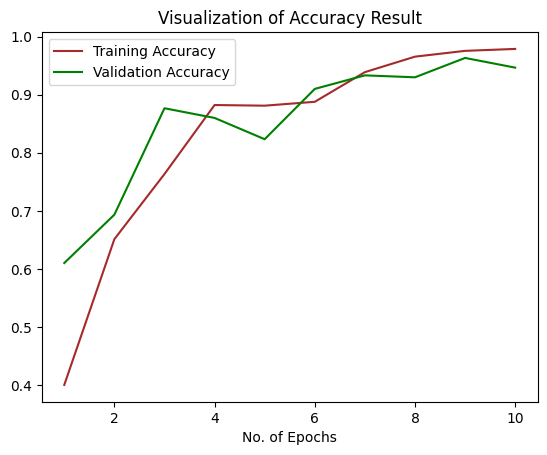

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,traning_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,traning_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()